In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
df.head(10)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
5,6c870d65-76b0-431d-bdf3-9292998e8211,Ishanvi Dar,Male,54,Gujarat,Ahmedabad,Ahmedabad Branch,Checking,af5f667c-d064-4083-bfb7-83396111a3da,25-01-2025,...,Entertainment,61258.85,Mobile Device,"Ahmedabad, Gujarat",POS,0,INR,+9198318XXXXXX,Seminar registration,ishanviXXX@XXXXX.com
6,5323737c-bbd2-423f-9c9b-e0433c8f75dc,Arya Shroff,Female,61,Delhi,New Delhi,New Delhi Branch,Business,b1355810-d246-4aeb-9932-347f32646172,04-01-2025,...,Health,36313.61,Payment Gateway Device,"New Delhi, Delhi",Desktop,0,INR,+9194785XXXXXX,Public transport pass,aryaXXX@XXXXX.com
7,c0c3d474-f6c2-4c66-9b0e-f9ba75c6f310,Jackson Shere,Male,32,Andaman and Nicobar Islands,Port Blair,Port Blair Branch,Business,c86a000c-d81f-40be-acdf-77fc072fd808,16-01-2025,...,Clothing,16948.73,Debit/Credit Card,"Port Blair, Andaman and Nicobar Islands",ATM,0,INR,+9193423XXXXXX,Online shopping,jacksonXXX@XXXXXXX.com
8,e9a82764-1253-4a46-ad34-80e3416fc801,Bhanumati Ravel,Male,52,Madhya Pradesh,Bhopal,Bhopal Branch,Business,323cc683-b0dc-40ee-a519-3b5dc96c7ed8,25-01-2025,...,Clothing,18138.71,ATM,"Bhopal, Madhya Pradesh",Mobile,0,INR,+9194374XXXXXX,Vacation payment,bhanumatiXXXXX@XXXXX.com
9,708224d5-192a-4d86-b411-8ec6d1bb274b,Meera Ganesh,Female,32,Chhattisgarh,Jagdalpur,Jagdalpur Branch,Business,9fad31ea-2770-4d80-a0ea-00972d5f02cc,02-01-2025,...,Entertainment,65801.35,Bank Branch,"Jagdalpur, Chhattisgarh",Desktop,0,INR,+9194511XXXXXX,Electronics purchase,meeraXXXXX@XXXXXXX.com


__Total Number of Rows & Columns__

In [29]:
df.shape

(200000, 24)

__Check all the Data Types in a Table__

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

__Check Duplicate__

In [31]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

__Check Missing / Null Values__

In [32]:
pd.isnull(df).sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

# Visualization Of Fraud Transactions

__Graph of Total Number of Frauds vs Safe Payments__


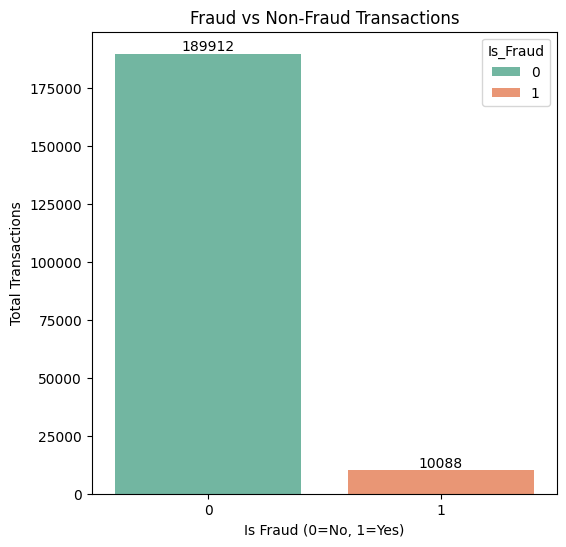

In [33]:
plt.figure(figsize=(6,6))
ax= sns.countplot(data=df, x="Is_Fraud", hue = "Is_Fraud", palette="Set2",legend=True)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0=No, 1=Yes)")
plt.ylabel("Total Transactions")
plt.show()

__Transaction Type VS Fraud Count__

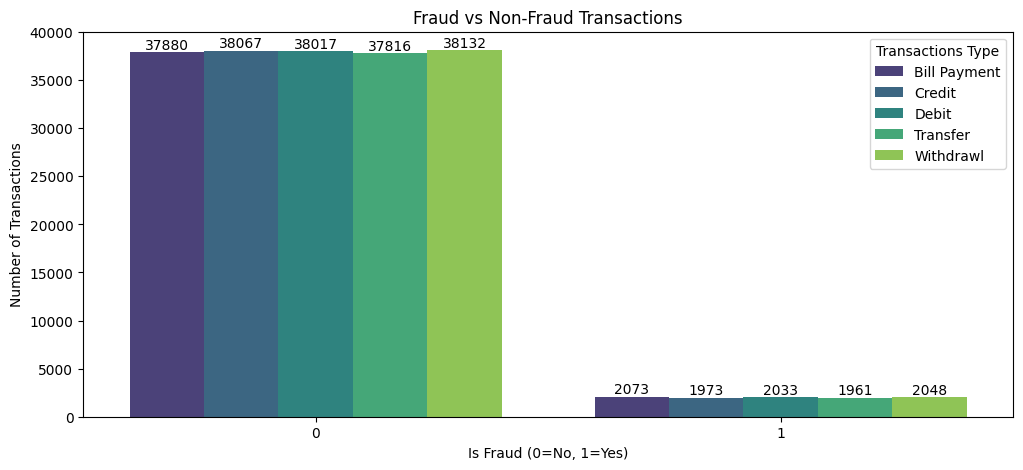

In [34]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df, hue="Transaction_Type", x = "Is_Fraud", palette="viridis",legend=True)
for bar in ax.containers:
    ax.bar_label(bar)
ax.legend(title = "Transactions Type", labels = ["Bill Payment", "Credit", "Debit", "Transfer","Withdrawl"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0=No, 1=Yes)")
plt.ylabel("Number of Transactions")
plt.show()

__Categorical Columns__

In [35]:
cat_cols = ['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Merchant_ID',
            'Transaction_Type', 'Merchant_Category', 'Transaction_Device',
            'Transaction_Location', 'Device_Type', 'Transaction_Currency']

__Unwanted Columns Removal__

In [36]:
drop_cols = ['Customer_ID', 'Customer_Name', 'Customer_Contact', 'Customer_Email', 'Transaction_Description',
             'Transaction_ID', 'Transaction_Date', 'Transaction_Time']
df = df.drop(columns=drop_cols, errors='ignore')

__Label Encoding Categorical Features__

In [37]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

__Feature & Target Variable Split__

In [38]:
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

__Train-Test Split__

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

__Feature Selection from RandomForestClassifier__

In [40]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features = X_train.columns[indices[:15]]

X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

__Categorical Feature Indices for SMOTENC__


In [42]:
cat_feat_indices = [X_train_fs.columns.get_loc(col) for col in cat_cols if col in X_train_fs]

__SMOTENC Oversampling for Class Imbalance__

In [43]:
max_rows = 7000

if X_train_fs.shape[0] > max_rows:
    X_train_small = X_train_fs.sample(n=max_rows, random_state=42)
    y_train_small = y_train.loc[X_train_small.index].reset_index(drop=True)
    X_train_small = X_train_small.reset_index(drop=True)
else:
    X_train_small = X_train_fs
    y_train_small = y_train.reset_index(drop=True)

smote_nc = SMOTENC(categorical_features=cat_feat_indices, sampling_strategy=0.4, random_state=42)
X_train_res, y_train_res = smote_nc.fit_resample(X_train_small, y_train_small)


__XGBoost Model Training with Hyperparameter Tuning__

In [44]:
params = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 5, 10, (y_train == 0).sum()/(y_train == 1).sum()]
}

__Model Prediction and Threshold Evaluation__

In [46]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, param_grid=params, scoring='f1', cv=3, verbose=1)
grid.fit(X_train_res, y_train_res)

fraud_model = grid.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


__Predicting Fraud Class Probabilities Using Model's predict_proba()__

In [47]:
y_probs = fraud_model.predict_proba(X_test_fs)[:, 1]

__Model Prediction and Threshold Evaluation__

In [48]:
from sklearn.metrics import accuracy_score

best_f1 = 0
best_threshold = 0.5

for t in np.arange(0.2, 0.9, 0.05):
    y_pred_temp = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    acc = accuracy_score(y_test, y_pred_temp)
    print(f"Threshold: {t:.2f} | F1 Score: {f1:.3f} | Accuracy: {acc:.3f}")
    if f1 > best_f1 and acc > 0.75:  # condition to keep accuracy high too
        best_f1 = f1
        best_threshold = t

print(f"Selected threshold: {best_threshold:.2f}")

Threshold: 0.20 | F1 Score: 0.082 | Accuracy: 0.799
Threshold: 0.25 | F1 Score: 0.075 | Accuracy: 0.836
Threshold: 0.30 | F1 Score: 0.070 | Accuracy: 0.863
Threshold: 0.35 | F1 Score: 0.065 | Accuracy: 0.882
Threshold: 0.40 | F1 Score: 0.054 | Accuracy: 0.898
Threshold: 0.45 | F1 Score: 0.049 | Accuracy: 0.909
Threshold: 0.50 | F1 Score: 0.043 | Accuracy: 0.918
Threshold: 0.55 | F1 Score: 0.039 | Accuracy: 0.925
Threshold: 0.60 | F1 Score: 0.029 | Accuracy: 0.931
Threshold: 0.65 | F1 Score: 0.019 | Accuracy: 0.936
Threshold: 0.70 | F1 Score: 0.017 | Accuracy: 0.940
Threshold: 0.75 | F1 Score: 0.014 | Accuracy: 0.944
Threshold: 0.80 | F1 Score: 0.009 | Accuracy: 0.946
Threshold: 0.85 | F1 Score: 0.006 | Accuracy: 0.948
Selected threshold: 0.20


__Model Evaluation Metrics__

In [49]:
y_pred = (y_probs >= best_threshold).astype(int)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31588  6394]
 [ 1659   359]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     37982
           1       0.05      0.18      0.08      2018

    accuracy                           0.80     40000
   macro avg       0.50      0.50      0.48     40000
weighted avg       0.90      0.80      0.85     40000



__Model Save and Load__

In [53]:
import joblib

# Model save karna
joblib.dump(fraud_model, 'fraud_model.joblib')

# Model load karna
loaded_model = joblib.load('fraud_model.joblib')
